# Hackathon : Reinforcement Learning for Drone Navigation

- Team name: Olympus Coders
- Team members names: Loan SAMAI, Farès BENAGGOUNE, Marc Estassy BATABA

## 0. Prerequisites

In [ ]:
%pip install -r requirements.txt

In [78]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

In [87]:
# On peut passer un seul fichier de configuration ou une liste de plusieurs configs
# Exemple avec une seule config : trained_agent, all_rewards = simulate.multi_config_train(["train_configs/config_1.json"])
# Exemple avec plusieurs configs : trained_agent, all_rewards = simulate.multi_config_train(["train_configs/config_1.json", "train_configs/config_3.json", "train_configs/config_7.json"])

trained_agent, all_rewards = simulate.multi_config_train([
    "train_configs/config_easy.json",
    "eval_configs/config_1.json", 
    "train_configs/config_medium.json",
    "eval_configs/config_5.json", 
     "eval_configs/config_8.json",
    "train_configs/config_hard.json"
], checkpoint_path="multi_config_checkpoint.pth", save_interval=50)




🚀 Début de l'entraînement multi-configurations 🚀

Tentative de chargement du checkpoint: multi_config_checkpoint.pth
Checkpoint chargé avec succès depuis multi_config_checkpoint.pth !
Épisode 1/500, Reward: 4630.75
Épisode 2/500, Reward: 1625.20
Épisode 3/500, Reward: 638.60
Épisode 4/500, Reward: 717.00
Épisode 5/500, Reward: 4375.60
Épisode 6/500, Reward: 1111.40
Épisode 7/500, Reward: 3301.30
Épisode 8/500, Reward: 1876.05
Épisode 9/500, Reward: 3530.50
Épisode 10/500, Reward: 577.95
Épisode 11/500, Reward: 4319.90
Épisode 12/500, Reward: 4265.05
Épisode 13/500, Reward: 4389.00
Épisode 14/500, Reward: 1710.40
Épisode 15/500, Reward: 4354.05
Épisode 16/500, Reward: 4611.30
Épisode 17/500, Reward: 2109.35
Épisode 18/500, Reward: 4461.25
Épisode 19/500, Reward: 3825.20
Épisode 20/500, Reward: 1983.80
Épisode 21/500, Reward: 3980.05
Épisode 22/500, Reward: 897.00
Épisode 23/500, Reward: 930.40
Épisode 24/500, Reward: 4245.30
Épisode 25/500, Reward: 4463.30
Épisode 26/500, Reward: 3370.

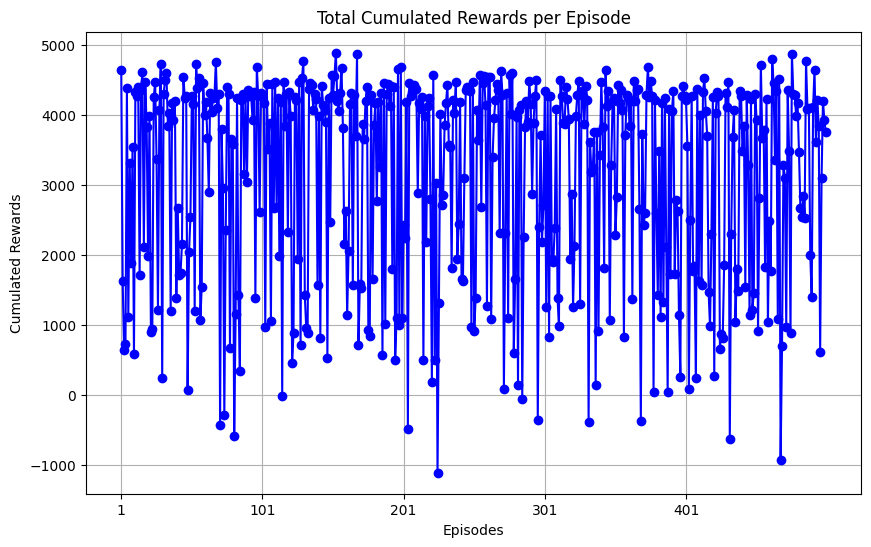

In [88]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [89]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [90]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./eval_configs/config_1.json ---

--- Evaluating Configuration: ./eval_configs/config_2.json ---

--- Evaluating Configuration: ./eval_configs/config_3.json ---

--- Evaluating Configuration: ./eval_configs/config_4.json ---

--- Evaluating Configuration: ./eval_configs/config_5.json ---

--- Evaluating Configuration: ./eval_configs/config_6.json ---

--- Evaluating Configuration: ./eval_configs/config_7.json ---

--- Evaluating Configuration: ./eval_configs/config_8.json ---

--- Evaluating Configuration: ./eval_configs/config_9.json ---

--- Evaluating Configuration: ./eval_configs/config_10.json ---


In [91]:
display(all_results)

,config_path,episode,total_reward,evacuated_agents,deactivated_agents
0,./eval_configs/config_1.json,1,-5000.0,0,0
1,./eval_configs/config_1.json,2,-5000.0,0,0
2,./eval_configs/config_1.json,3,-5000.0,0,0
3,./eval_configs/config_1.json,4,-5000.0,0,0
4,./eval_configs/config_1.json,5,-5000.0,0,0
...,...,...,...,...,...
95,./eval_configs/config_10.json,6,-5000.0,0,0
96,./eval_configs/config_10.json,7,-5000.0,0,0
97,./eval_configs/config_10.json,8,-5000.0,0,0
98,./eval_configs/config_10.json,9,-5000.0,0,0


In [92]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)

,config_path,total_reward,evacuated_agents,deactivated_agents
0,./eval_configs/config_1.json,-5000.00,0.0,0.0
1,./eval_configs/config_10.json,-5000.00,0.0,0.0
2,./eval_configs/config_2.json,-5000.00,0.0,0.0
3,./eval_configs/config_3.json,-5000.00,0.0,0.0
4,./eval_configs/config_4.json,-1079.29,0.8,0.0
5,./eval_configs/config_5.json,49.23,1.0,0.0
6,./eval_configs/config_6.json,-4839.34,0.0,0.0
7,./eval_configs/config_7.json,-1746.75,0.2,0.0
8,./eval_configs/config_8.json,-5000.00,0.0,0.0
9,./eval_configs/config_9.json,-5000.00,0.0,0.0
